In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("IMDB-Movie-Data.csv")
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [33]:
print(df.head())
print(df.info())
print(df.describe())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [48]:
# fill empty genres and split genres

df['Genre'] = df['Genre'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_genre = df.explode('Genre')

top_movies = df_genre.sort_values('Rating', ascending=False).groupby('Genre').head(5)

print(top_movies[['Title', 'Genre', 'Rating']])

                     Title      Genre  Rating
54         The Dark Knight      Crime     9.0
54         The Dark Knight      Drama     9.0
54         The Dark Knight     Action     9.0
117                 Dangal  Biography     8.8
117                 Dangal      Drama     8.8
..                     ...        ...     ...
139              Brimstone    Western     7.1
38   The Magnificent Seven    Western     6.9
969        The Lone Ranger    Western     6.5
128             Mamma Mia!    Musical     6.4
972           Rock of Ages    Musical     5.9

[100 rows x 3 columns]


In [ ]:
# average rating per year
ratings_by_year = df.groupby('Year')['Rating'].mean()

print(ratings_by_year)

Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64


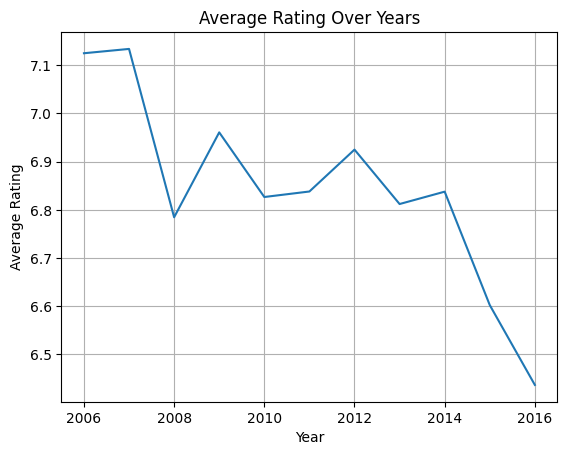

In [50]:
#plot

ratings_by_year.plot(kind='line', title='Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

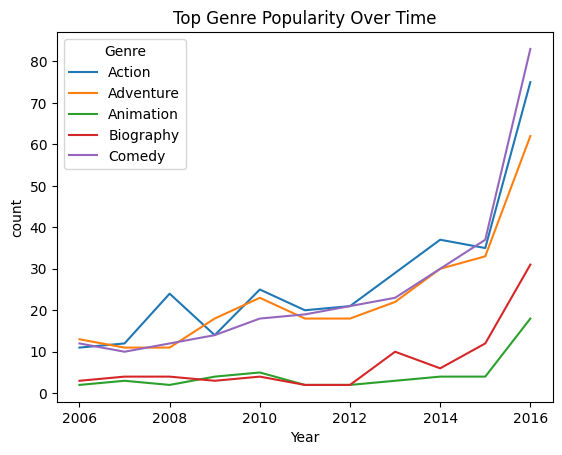

In [51]:
# Number of movies per genre per year

genre_year = df_genre.groupby(['Year', 'Genre']).size().reset_index(name='count')

top_genres = genre_year['Genre'].value_counts().head(5).index

filtered = genre_year[genre_year['Genre'].isin(top_genres)]

# Plot

sns.lineplot(data=filtered, x ='Year', y='count', hue='Genre')

plt.title("Top Genre Popularity Over Time")
plt.show()

In [4]:
g = df.groupby("Rating")
g

In [8]:
g.max()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore
Rating,,,,,,,,,,,
1.9,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,77207,14.17,15.0
2.7,872,Dragonball Evolution,Horror,The young warrior Son Goku sets out on a quest...,Shawn Burkett,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2016,85,59512,9.35,45.0
3.2,648,Tall Men,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,173,NaN,57.0
3.5,969,Wrecker,"Crime,Drama",Gunz (Dylan Duffus) is thrust into a world of ...,Micheal Bafaro,"Dylan Duffus, Scorcher,Shone Romulus, Jade Asha",2016,104,1210,NaN,59.0
3.7,270,The Last Face,Horror,Four friends on their way to Coachella stop of...,Sean Penn,"Sarah Hyland, Steven Krueger, Justin Chon, Cla...",2016,130,2384,NaN,16.0
3.9,526,The Disappointments Room,Horror,"Young, up-and-coming martial artist, Bruce Lee...",Rolfe Kanefsky,"Natasha Henstridge, Lukas Hassel, Lin Shaye,Do...",2016,103,4895,93.05,71.0
4.0,617,2307: Winter's Dream,Sci-Fi,"In 2307, a future soldier is sent on a mission...",Joey Curtis,"Paul Sidhu, Branden Coles, Arielle Holmes, Kel...",2016,101,277,20.76,53.0
4.1,64,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,244474,166.15,46.0
4.2,839,The Last Airbender,"Crime,Drama,Mystery","Follows the adventures of Aang, a young succes...",M. Night Shyamalan,"Noah Ringer, Nicola Peltz, Jackson Rathbone,De...",2016,103,125129,NaN,23.0


In [9]:
g.min()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore
Rating,,,,,,,,,,,
1.9,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,77207,14.17,15.0
2.7,43,Don't Fuck in the Woods,"Action,Adventure,Fantasy",A group of friends are going on a camping trip...,James Wong,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2009,73,496,9.35,45.0
3.2,648,Tall Men,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,173,NaN,57.0
3.5,891,The Intent,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Femi Oyeniran,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83,202,NaN,37.0
3.7,50,Satanic,Drama,A director (Charlize Theron) of an internation...,Jeffrey G. Hunt,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,85,987,NaN,16.0
3.9,238,Birth of the Dragon,"Action,Biography,Drama",A mother and her young son release unimaginabl...,D.J. Caruso,"Billy Magnussen, Terry Chen, Teresa Navarro,Va...",2016,85,240,2.41,31.0
4.0,617,2307: Winter's Dream,Sci-Fi,"In 2307, a future soldier is sent on a mission...",Joey Curtis,"Paul Sidhu, Branden Coles, Arielle Holmes, Kel...",2016,101,277,20.76,53.0
4.1,64,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,244474,166.15,46.0
4.2,582,Exposed,"Action,Adventure,Family",A police detective investigates the truth behi...,Gee Malik Linton,"Ana de Armas, Keanu Reeves, Christopher McDona...",2010,102,8409,NaN,20.0


In [10]:
g.count()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore
Rating,,,,,,,,,,,
1.9,1,1,1,1,1,1,1,1,1,1,1
2.7,2,2,2,2,2,2,2,2,2,1,1
3.2,1,1,1,1,1,1,1,1,1,0,1
3.5,2,2,2,2,2,2,2,2,2,0,2
3.7,2,2,2,2,2,2,2,2,2,0,1
3.9,3,3,3,3,3,3,3,3,3,2,3
4.0,1,1,1,1,1,1,1,1,1,1,1
4.1,1,1,1,1,1,1,1,1,1,1,1
4.2,2,2,2,2,2,2,2,2,2,0,2


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Rating
1.9    Axes(0.125,0.11;0.775x0.77)
2.7    Axes(0.125,0.11;0.775x0.77)
3.2    Axes(0.125,0.11;0.775x0.77)
3.5    Axes(0.125,0.11;0.775x0.77)
3.7    Axes(0.125,0.11;0.775x0.77)
3.9    Axes(0.125,0.11;0.775x0.77)
4.0    Axes(0.125,0.11;0.775x0.77)
4.1    Axes(0.125,0.11;0.775x0.77)
4.2    Axes(0.125,0.11;0.775x0.77)
4.3    Axes(0.125,0.11;0.775x0.77)
4.4    Axes(0.125,0.11;0.775x0.77)
4.5    Axes(0.125,0.11;0.775x0.77)
4.6    Axes(0.125,0.11;0.775x0.77)
4.7    Axes(0.125,0.11;0.775x0.77)
4.8    Axes(0.125,0.11;0.775x0.77)
4.9    Axes(0.125,0.11;0.775x0.77)
5.0    Axes(0.125,0.11;0.775x0.77)
5.1    Axes(0.125,0.11;0.775x0.77)
5.2    Axes(0.125,0.11;0.775x0.77)
5.3    Axes(0.125,0.11;0.775x0.77)
5.4    Axes(0.125,0.11;0.775x0.77)
5.5    Axes(0.125,0.11;0.775x0.77)
5.6    Axes(0.125,0.11;0.775x0.77)
5.7    Axes(0.125,0.11;0.775x0.77)
5.8    Axes(0.125,0.11;0.775x0.77)
5.9    Axes(0.125,0.11;0.775x0.77)
6.0    Axes(0.125,0.11;0.775x0.77)
6.1    Axes(0.125,0.11;0.775x0.77)
6.2    Axes(0

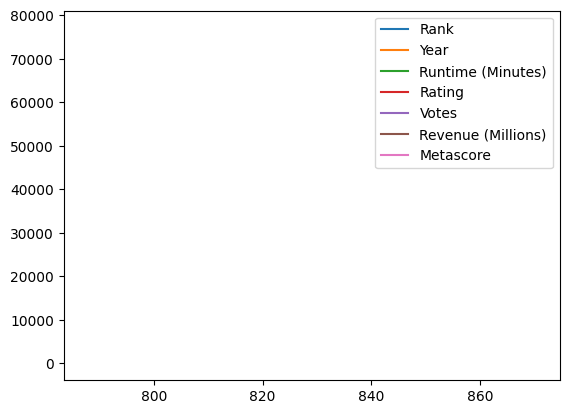

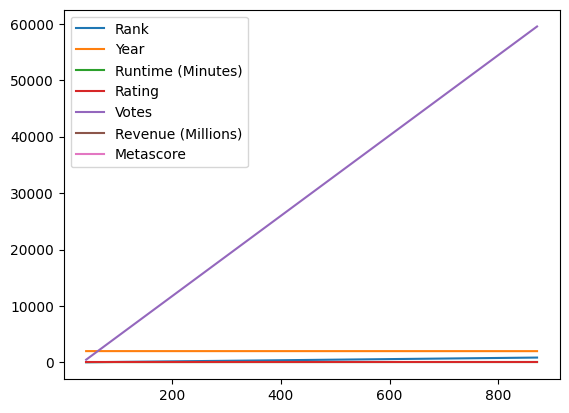

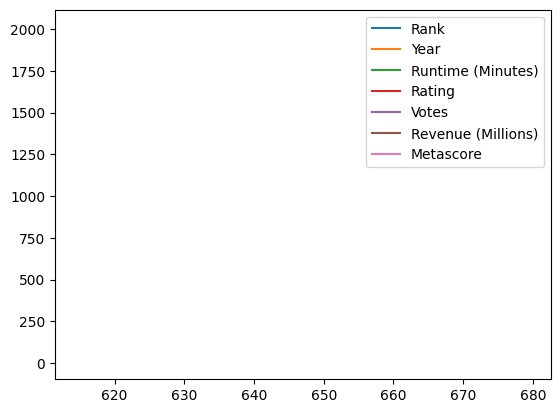

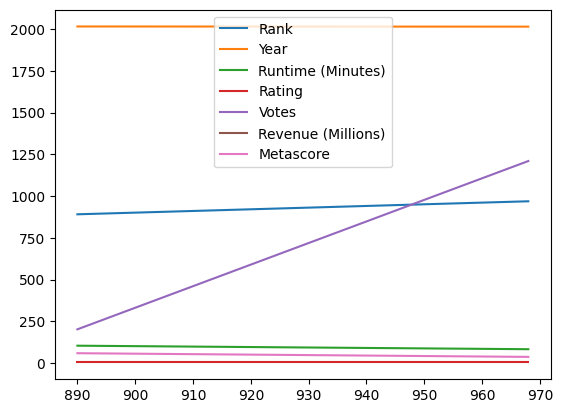

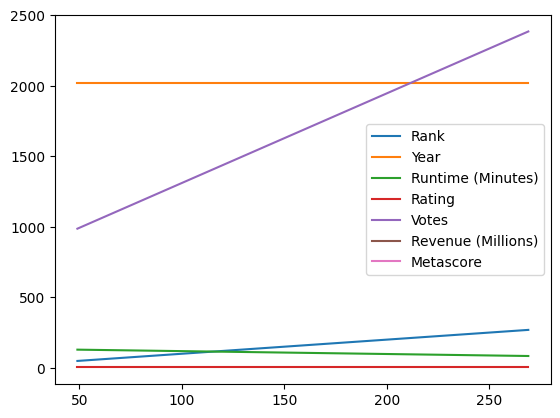

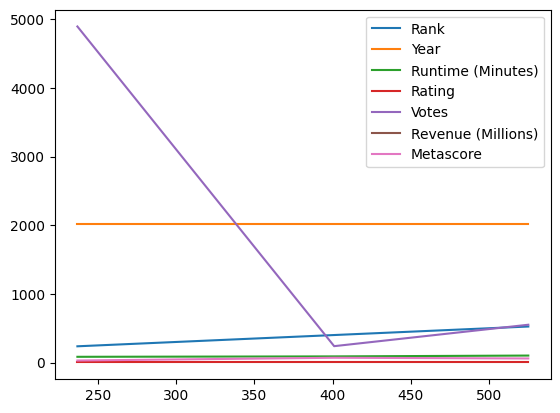

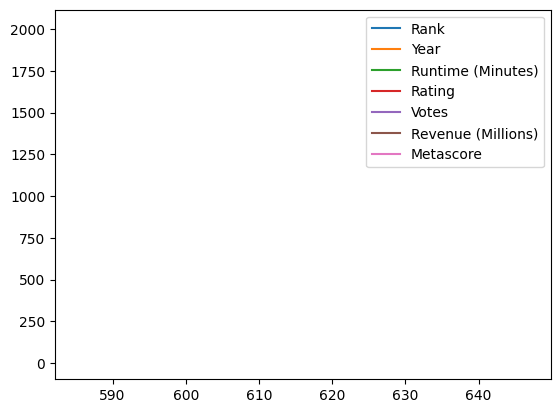

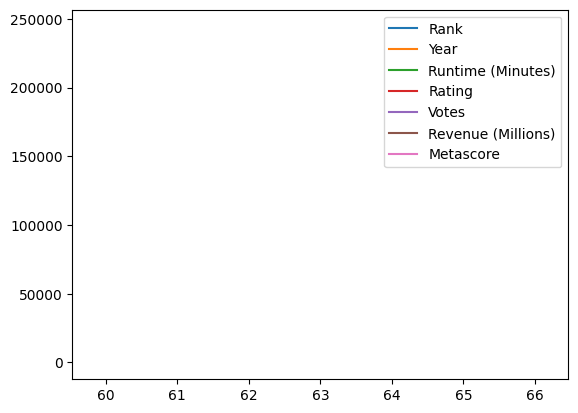

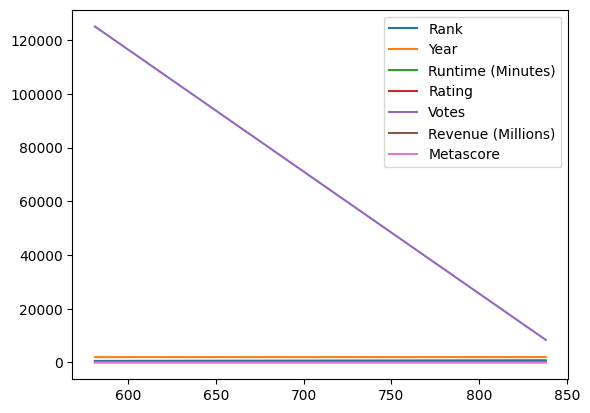

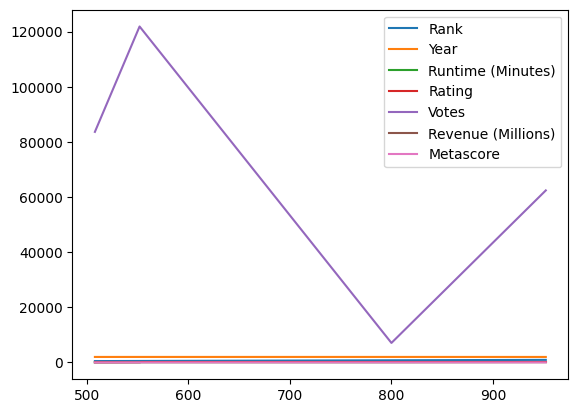

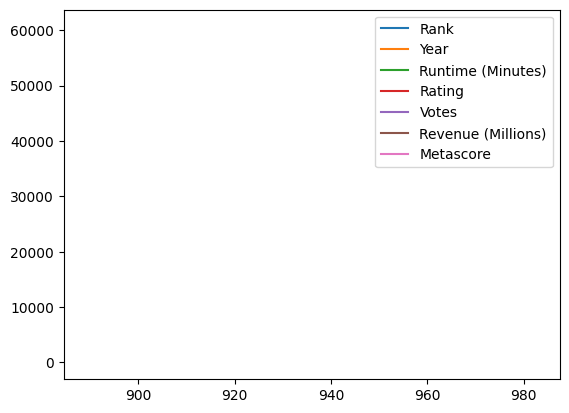

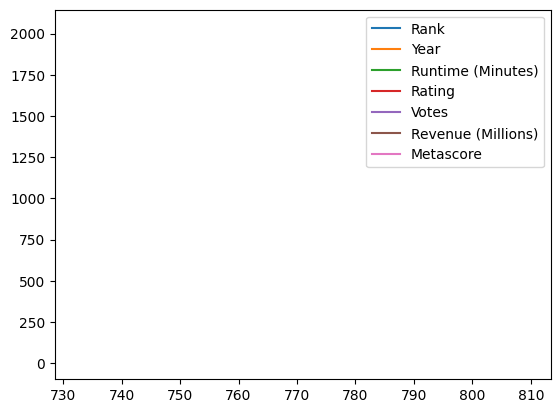

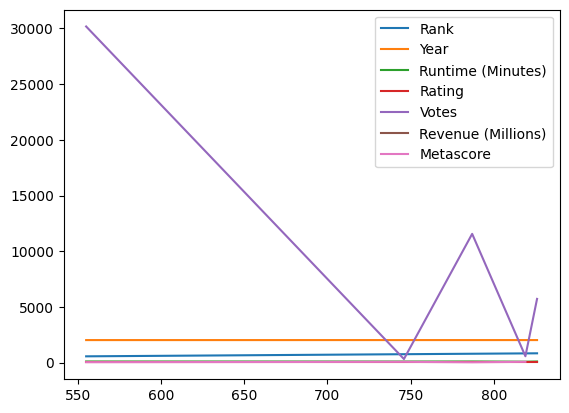

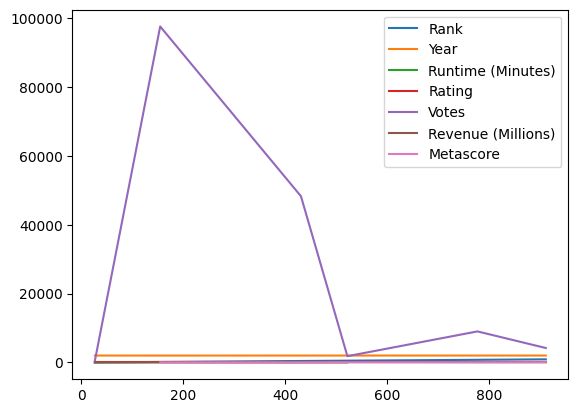

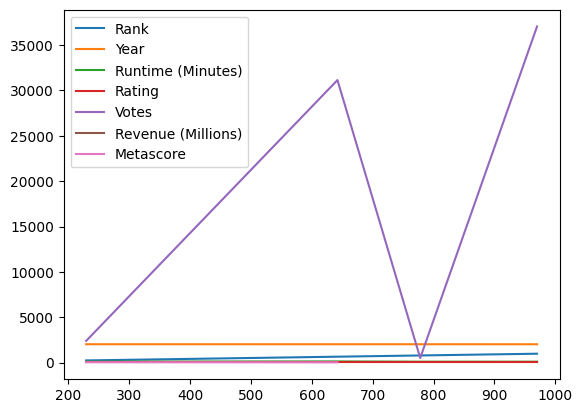

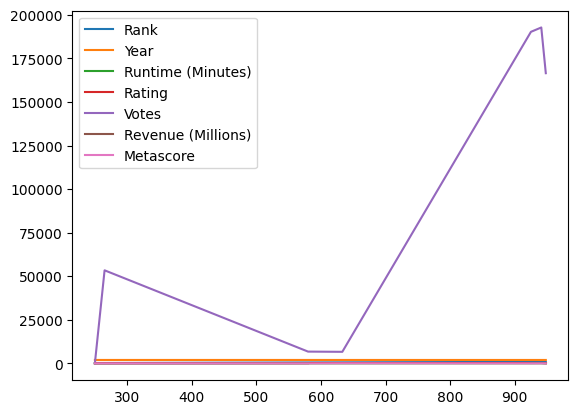

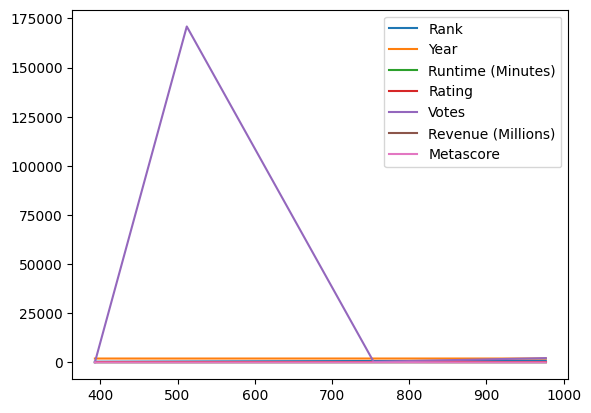

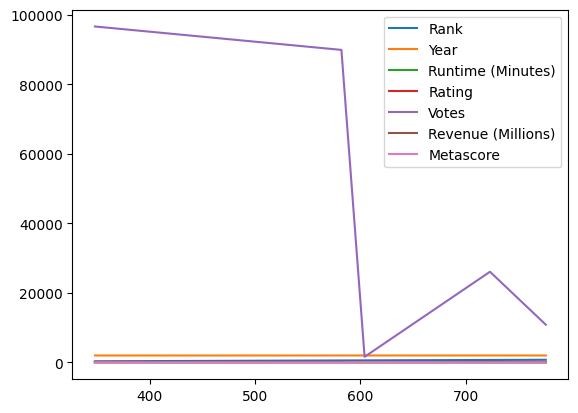

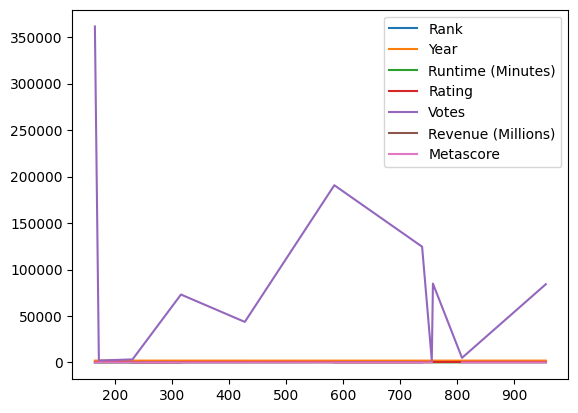

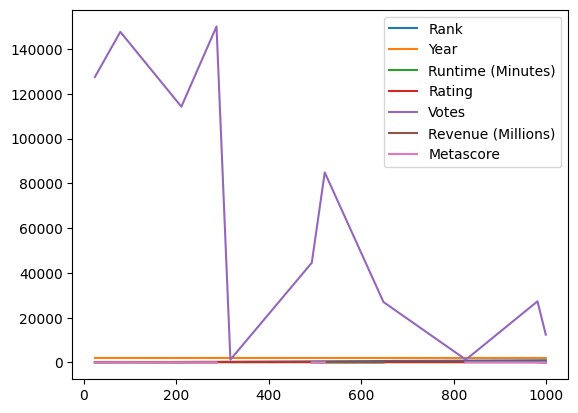

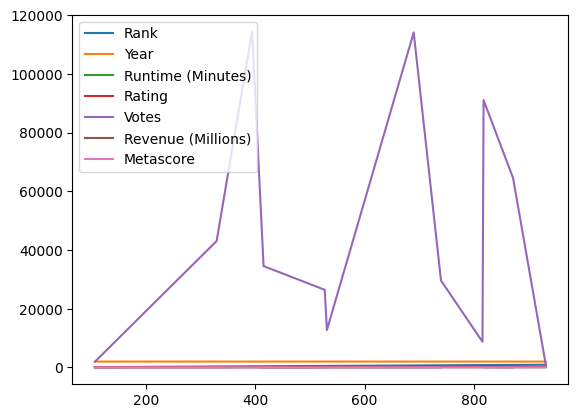

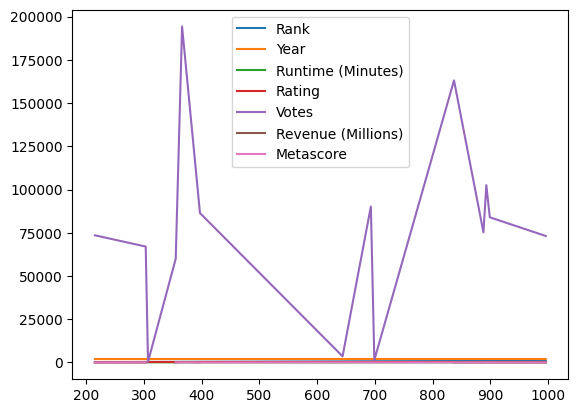

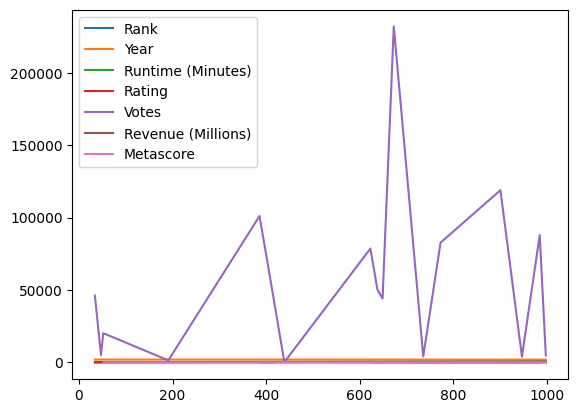

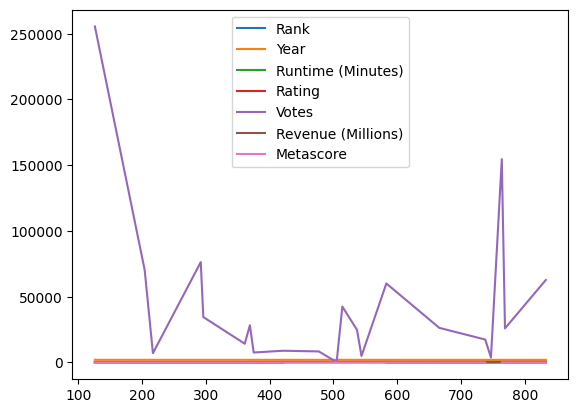

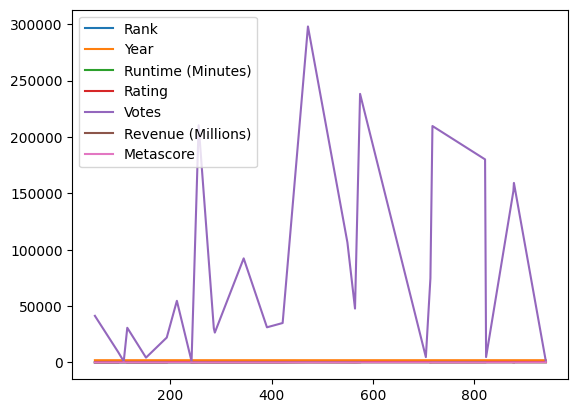

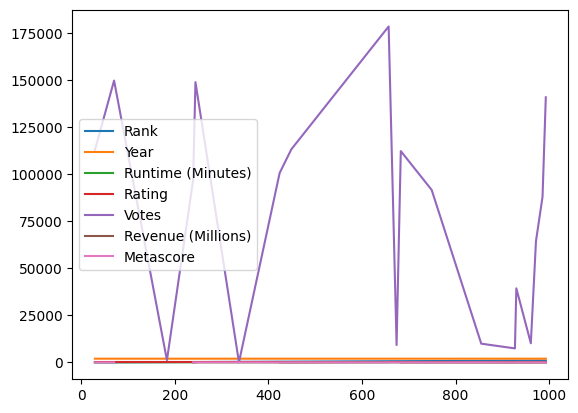

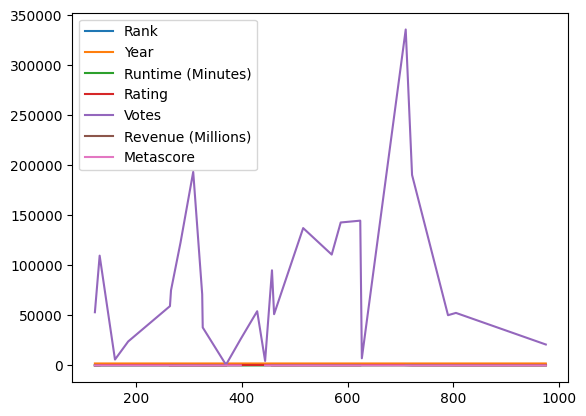

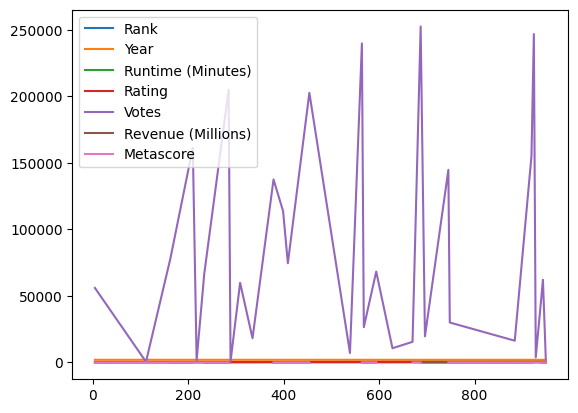

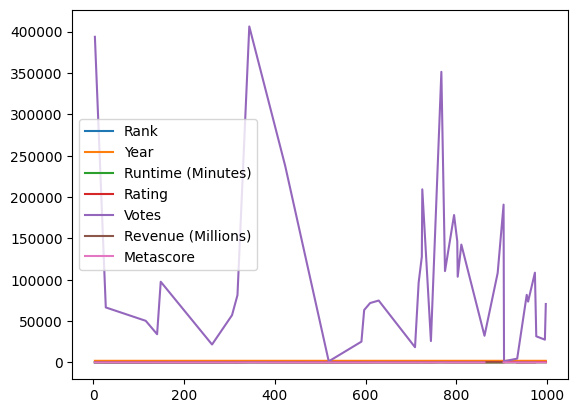

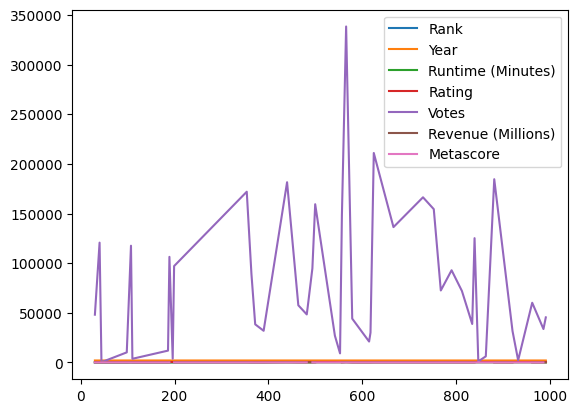

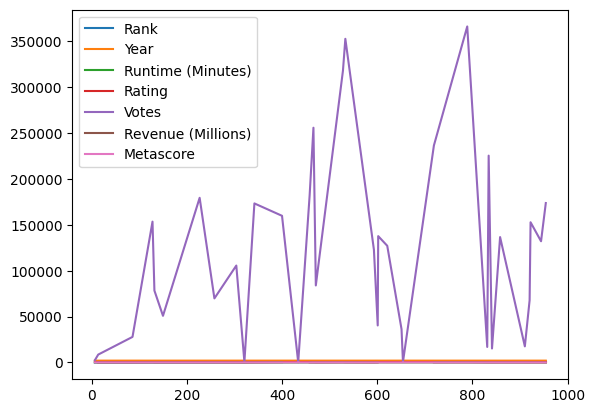

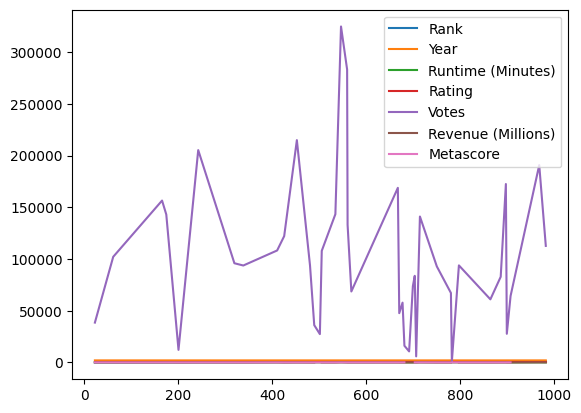

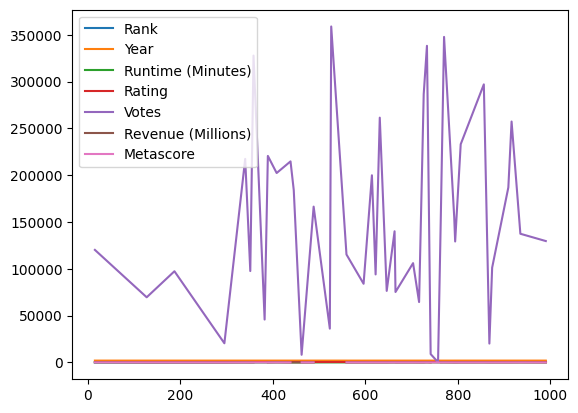

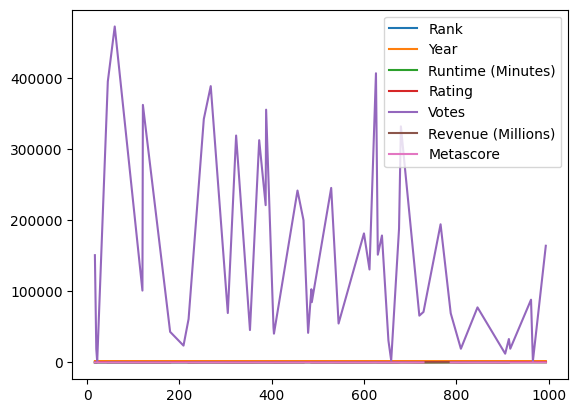

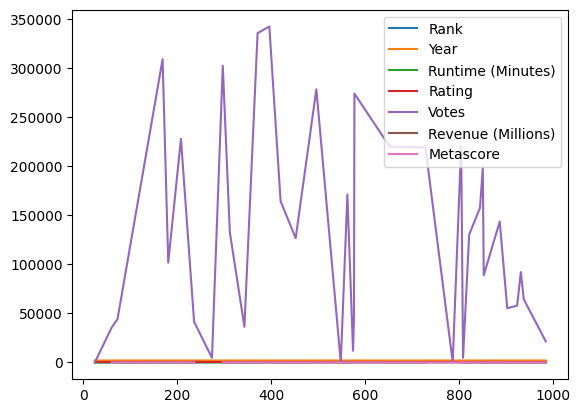

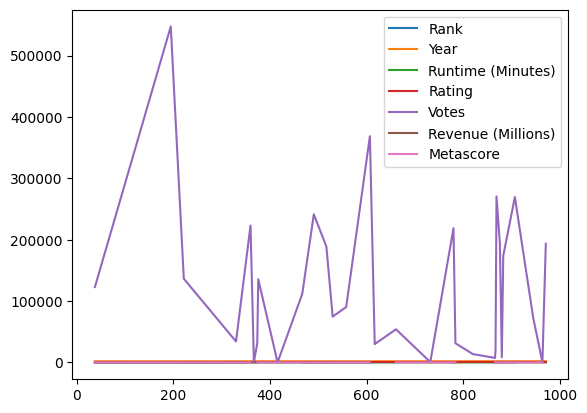

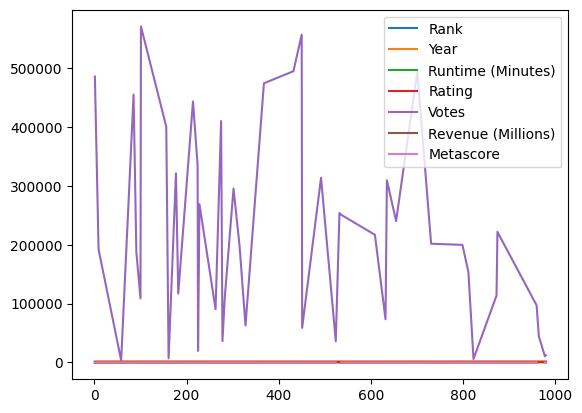

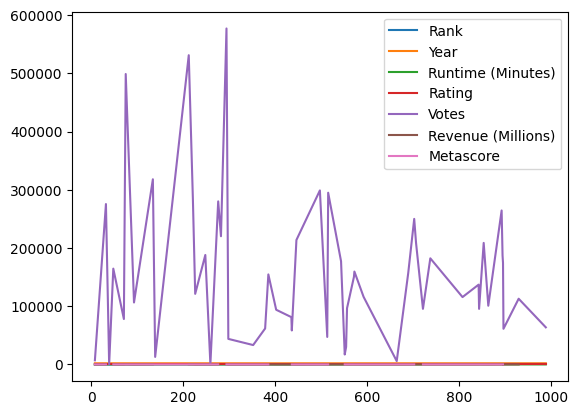

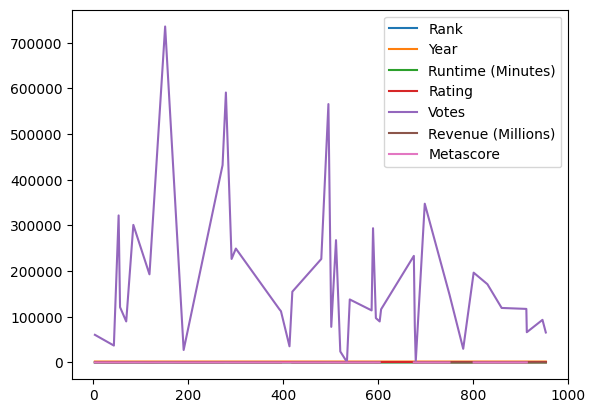

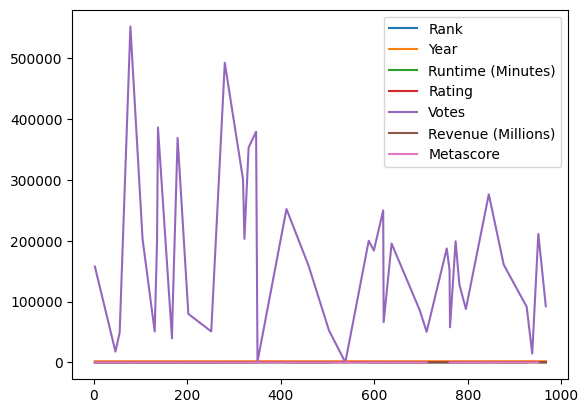

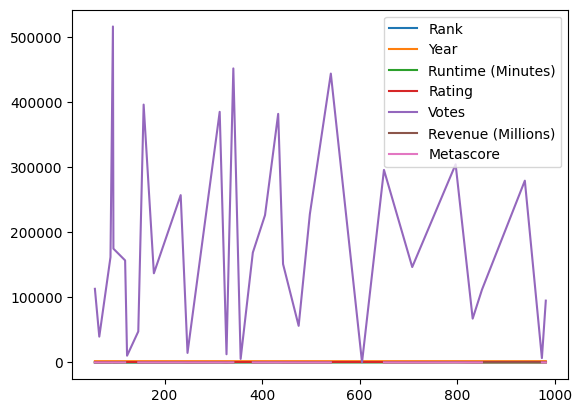

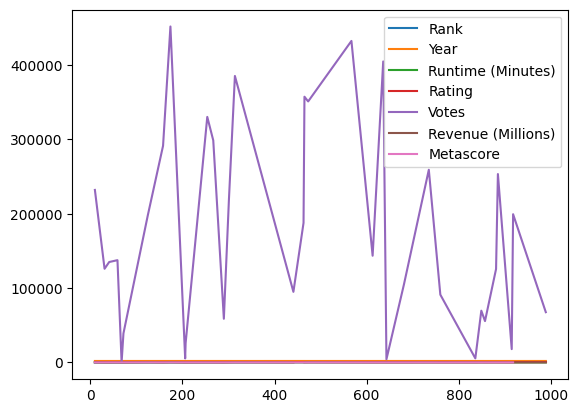

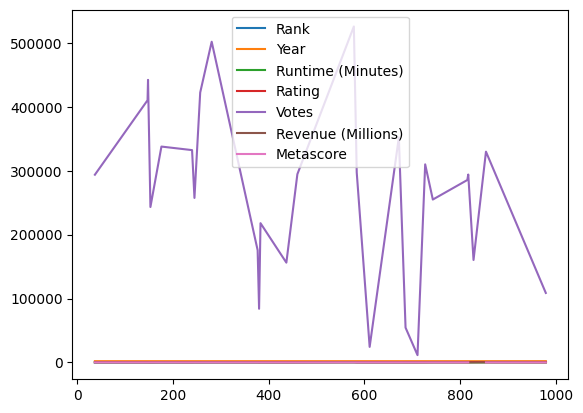

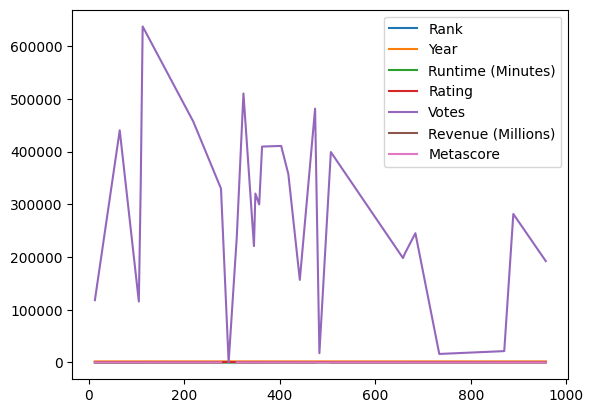

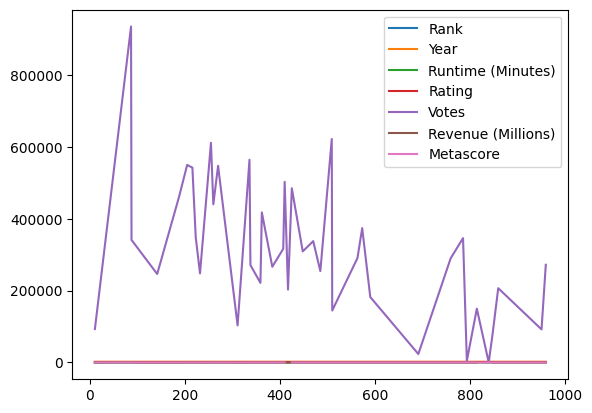

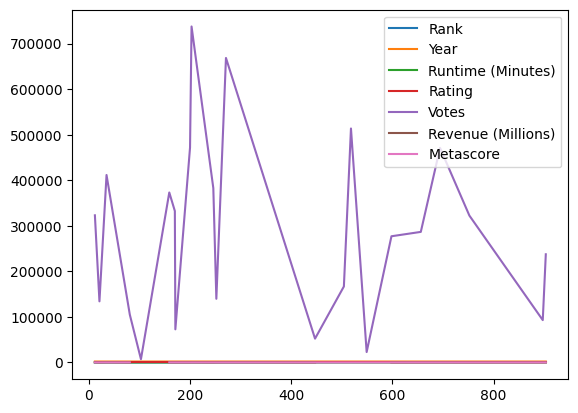

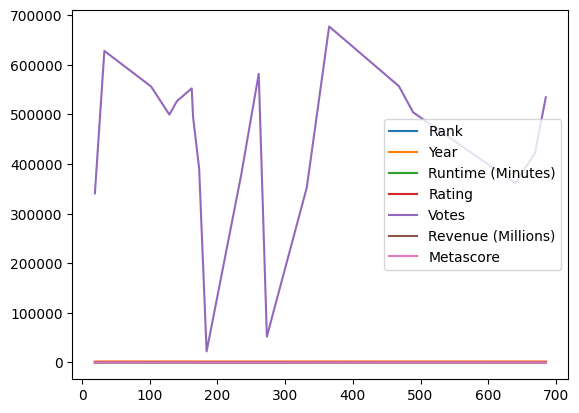

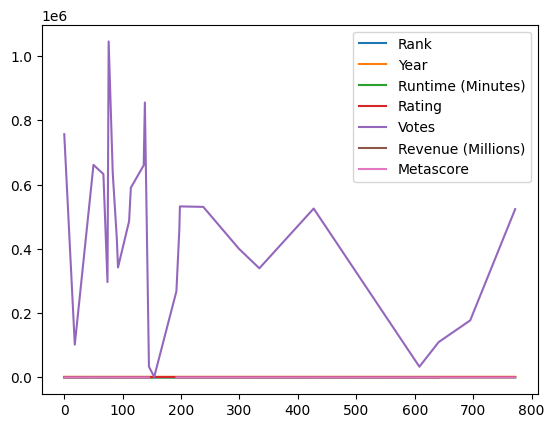

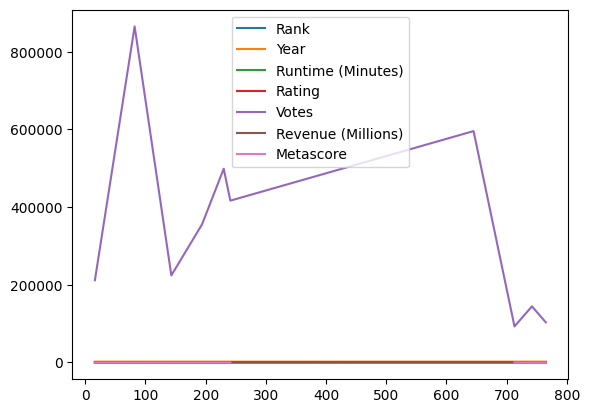

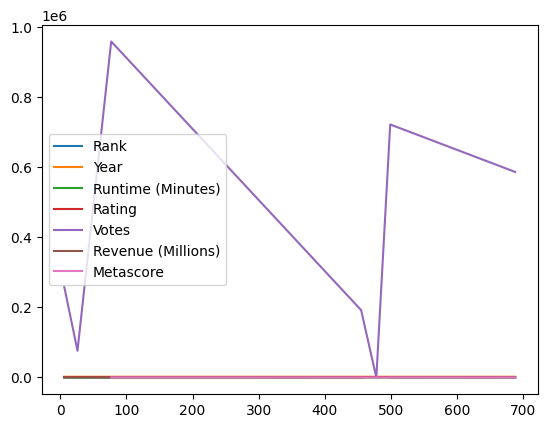

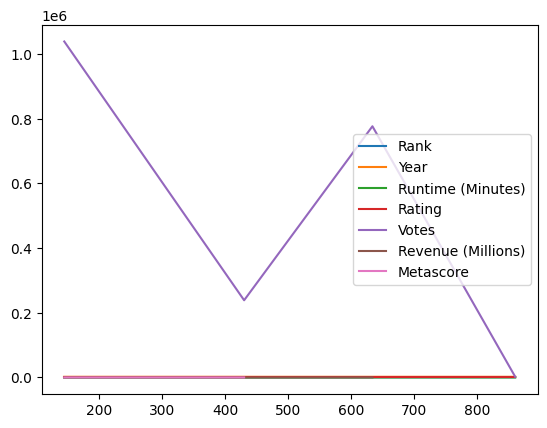

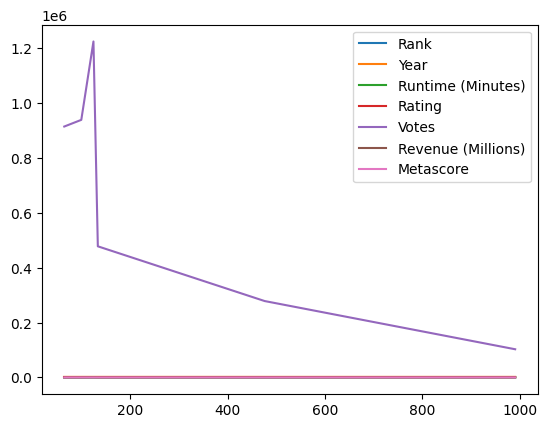

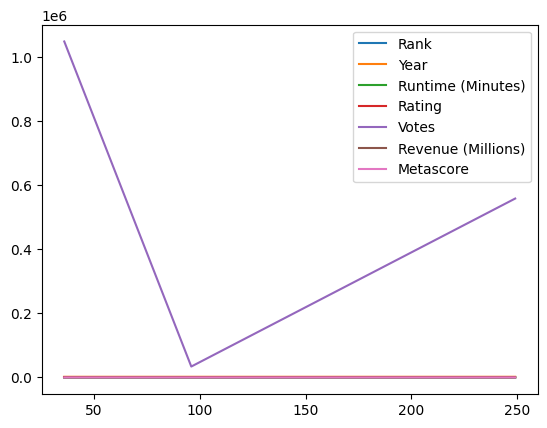

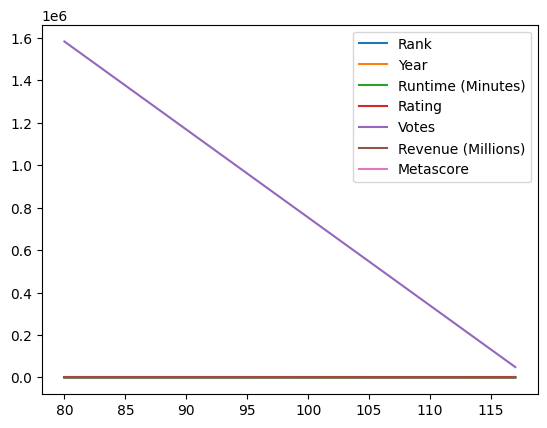

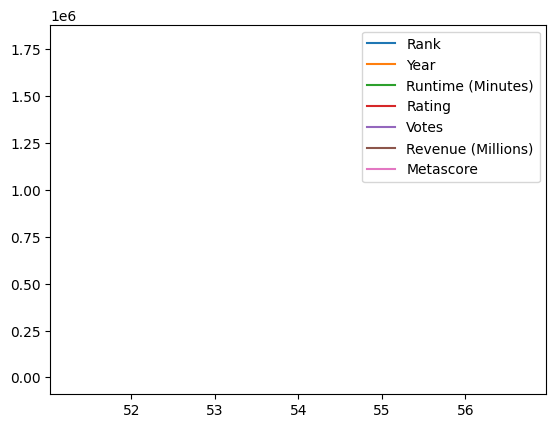

In [11]:
%matplotlib inline
g.plot()

In [12]:
df.tail(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [15]:
df.shape
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  1000
Number of columns:  12


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [19]:
df.isnull() #check null values in the dataset   

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [20]:
df.describe(    )

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [22]:
df.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A stuffy businessman finds himself trapped ins...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [30]:
df['Rating'].max()
df.max()

Rank                                                               1000
Title                                                          Zootopia
Genre                                                      Thriller,War
Description           Young, up-and-coming martial artist, Bruce Lee...
Director                                                  Zackary Adler
Actors                Zooey Deschanel, Joseph Gordon-Levitt, Geoffre...
Year                                                               2016
Runtime (Minutes)                                                   191
Rating                                                              9.0
Votes                                                           1791916
Revenue (Millions)                                               936.63
Metascore                                                         100.0
dtype: object